In [18]:
## import libraries
import numpy as np
import pandas as pd
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, LSTM, Activation, TimeDistributed, RepeatVector, Bidirectional, CuDNNLSTM
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.regularizers import l2

In [19]:
# set GPU memory
gpu_options = tf.GPUOptions(allow_growth=True)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

In [20]:
n_step = 9

In [21]:
def split(data, depth):
    dataset = data
    depth = depth
    X = np.zeros([int(depth), n_step, 3])
    Y = np.zeros([int(depth), n_step, 3])
    c = 0
    d = 0
    
    for i in range(int(depth)):
        for j in range(n_step):
            if d < dataset.shape[0]:
                X[i,j,:] = dataset[d, c:c+3]
                Y[i,j,:] = dataset[d, (c+3*n_step):(c+3*n_step+3)]
                
                if ((c+3*n_step+3) != (dataset.shape[1])):
                    c +=3
                else:
                    c = 0
                    d += 1
        if (c-3) > 0:
            c = (c - 3*n_step + 3)
        else:
            c = c
            
    return X, Y

In [22]:
dataset = pd.read_csv('./datasets/prediction/top5.csv', header=None)
dataset = dataset.fillna(0)
dataset = np.array(dataset)
dataset.shape

(500, 138)

In [23]:
maxlen_train = dataset.shape[1]+(n_step-1)*3
maxlen_train

162

In [24]:
dataset = sequence.pad_sequences(dataset, maxlen=maxlen_train, padding='post', dtype='float32')
dataset.shape

(500, 162)

In [25]:
depth_train = (int(dataset.shape[1]/3)+1-n_step-n_step)*dataset.shape[0] # (all_balls + 1 - input_balls - output_balls)*n_rows

In [26]:
x_train, y_train = split(data=dataset, depth=depth_train)

In [50]:
model = Sequential()
model.add(CuDNNLSTM(256, input_shape=(x_train.shape[1], x_train.shape[2]), kernel_regularizer=l2(0.01)))
model.add(RepeatVector(x_train.shape[1]))
model.add(CuDNNLSTM(256, return_sequences=True ,activity_regularizer=l2(0.01)))
model.add(TimeDistributed(Dense(3)))

model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [51]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_5 (CuDNNLSTM)     (None, 256)               267264    
_________________________________________________________________
repeat_vector_3 (RepeatVecto (None, 9, 256)            0         
_________________________________________________________________
cu_dnnlstm_6 (CuDNNLSTM)     (None, 9, 256)            526336    
_________________________________________________________________
time_distributed_3 (TimeDist (None, 9, 3)              771       
Total params: 794,371
Trainable params: 794,371
Non-trainable params: 0
_________________________________________________________________


In [52]:
history = model.fit(x_train, y_train, batch_size=2000, epochs=2000, shuffle=True)

Epoch 1/2000
18500/18500 [==============================] - 1s 31us/step - loss: 3385.0832 - acc: 0.7611
Epoch 2/2000
18500/18500 [==============================] - 0s 11us/step - loss: 2828.6385 - acc: 0.6685
Epoch 3/2000
18500/18500 [==============================] - 0s 11us/step - loss: 2521.8610 - acc: 0.7470
Epoch 4/2000
18500/18500 [==============================] - 0s 11us/step - loss: 2341.7592 - acc: 0.7409
Epoch 5/2000
18500/18500 [==============================] - 0s 11us/step - loss: 2192.5876 - acc: 0.7863
Epoch 6/2000
18500/18500 [==============================] - 0s 11us/step - loss: 2059.3233 - acc: 0.7832
Epoch 7/2000
18500/18500 [==============================] - 0s 12us/step - loss: 1939.2698 - acc: 0.8396
Epoch 8/2000
18500/18500 [==============================] - 0s 11us/step - loss: 1830.5132 - acc: 0.8377
Epoch 9/2000
18500/18500 [==============================] - 0s 11us/step - loss: 1731.2025 - acc: 0.8497
Epoch 10/2000
18500/18500 [============================

18500/18500 [==============================] - 0s 12us/step - loss: 173.3007 - acc: 0.8572
Epoch 79/2000
18500/18500 [==============================] - 0s 12us/step - loss: 169.5827 - acc: 0.8550
Epoch 80/2000
18500/18500 [==============================] - 0s 11us/step - loss: 165.4995 - acc: 0.8606
Epoch 81/2000
18500/18500 [==============================] - 0s 11us/step - loss: 161.3718 - acc: 0.8519
Epoch 82/2000
18500/18500 [==============================] - 0s 11us/step - loss: 158.9512 - acc: 0.8533
Epoch 83/2000
18500/18500 [==============================] - 0s 11us/step - loss: 154.1074 - acc: 0.8606
Epoch 84/2000
18500/18500 [==============================] - 0s 11us/step - loss: 150.3633 - acc: 0.8609
Epoch 85/2000
18500/18500 [==============================] - 0s 11us/step - loss: 148.0750 - acc: 0.8633
Epoch 86/2000
18500/18500 [==============================] - 0s 10us/step - loss: 144.1881 - acc: 0.8622
Epoch 87/2000
18500/18500 [==============================] - 0s 10us/

18500/18500 [==============================] - 0s 11us/step - loss: 47.7560 - acc: 0.8475
Epoch 157/2000
18500/18500 [==============================] - 0s 11us/step - loss: 46.1786 - acc: 0.8439
Epoch 158/2000
18500/18500 [==============================] - 0s 11us/step - loss: 45.0935 - acc: 0.8433
Epoch 159/2000
18500/18500 [==============================] - 0s 11us/step - loss: 44.5708 - acc: 0.8445
Epoch 160/2000
18500/18500 [==============================] - 0s 11us/step - loss: 44.3172 - acc: 0.8478
Epoch 161/2000
18500/18500 [==============================] - 0s 11us/step - loss: 45.2462 - acc: 0.8469
Epoch 162/2000
18500/18500 [==============================] - 0s 11us/step - loss: 44.4282 - acc: 0.8452
Epoch 163/2000
18500/18500 [==============================] - 0s 11us/step - loss: 43.9803 - acc: 0.8482
Epoch 164/2000
18500/18500 [==============================] - 0s 11us/step - loss: 42.5520 - acc: 0.8428
Epoch 165/2000
18500/18500 [==============================] - 0s 11us/

18500/18500 [==============================] - 0s 11us/step - loss: 22.4828 - acc: 0.8244
Epoch 234/2000
18500/18500 [==============================] - 0s 11us/step - loss: 22.2932 - acc: 0.8245
Epoch 235/2000
18500/18500 [==============================] - 0s 12us/step - loss: 22.1065 - acc: 0.8233
Epoch 236/2000
18500/18500 [==============================] - 0s 11us/step - loss: 23.8364 - acc: 0.8148
Epoch 237/2000
18500/18500 [==============================] - 0s 11us/step - loss: 24.4538 - acc: 0.8340
Epoch 238/2000
18500/18500 [==============================] - 0s 11us/step - loss: 22.2858 - acc: 0.8448
Epoch 239/2000
18500/18500 [==============================] - 0s 11us/step - loss: 21.5617 - acc: 0.8374
Epoch 240/2000
18500/18500 [==============================] - 0s 13us/step - loss: 21.4188 - acc: 0.8240
Epoch 241/2000
18500/18500 [==============================] - 0s 11us/step - loss: 21.4891 - acc: 0.8182
Epoch 242/2000
18500/18500 [==============================] - 0s 11us/

18500/18500 [==============================] - 0s 11us/step - loss: 13.7104 - acc: 0.8202
Epoch 312/2000
18500/18500 [==============================] - 0s 11us/step - loss: 13.7560 - acc: 0.8304
Epoch 313/2000
18500/18500 [==============================] - 0s 12us/step - loss: 13.1587 - acc: 0.8277
Epoch 314/2000
18500/18500 [==============================] - 0s 12us/step - loss: 13.8226 - acc: 0.8241
Epoch 315/2000
18500/18500 [==============================] - 0s 11us/step - loss: 13.0666 - acc: 0.8216
Epoch 316/2000
18500/18500 [==============================] - 0s 11us/step - loss: 13.1927 - acc: 0.8205
Epoch 317/2000
18500/18500 [==============================] - 0s 11us/step - loss: 14.0452 - acc: 0.8284
Epoch 318/2000
18500/18500 [==============================] - 0s 11us/step - loss: 13.7045 - acc: 0.8315
Epoch 319/2000
18500/18500 [==============================] - 0s 12us/step - loss: 12.5079 - acc: 0.8410
Epoch 320/2000
18500/18500 [==============================] - 0s 11us/

Epoch 389/2000
18500/18500 [==============================] - 0s 12us/step - loss: 8.5610 - acc: 0.8284
Epoch 390/2000
18500/18500 [==============================] - 0s 12us/step - loss: 8.6610 - acc: 0.8363
Epoch 391/2000
18500/18500 [==============================] - 0s 12us/step - loss: 8.4626 - acc: 0.8380
Epoch 392/2000
18500/18500 [==============================] - 0s 12us/step - loss: 8.6071 - acc: 0.8336
Epoch 393/2000
18500/18500 [==============================] - 0s 13us/step - loss: 8.3943 - acc: 0.8282
Epoch 394/2000
18500/18500 [==============================] - 0s 12us/step - loss: 8.8457 - acc: 0.8207
Epoch 395/2000
18500/18500 [==============================] - 0s 12us/step - loss: 8.6941 - acc: 0.8080
Epoch 396/2000
18500/18500 [==============================] - 0s 12us/step - loss: 8.6608 - acc: 0.8283
Epoch 397/2000
18500/18500 [==============================] - 0s 12us/step - loss: 8.8085 - acc: 0.8402
Epoch 398/2000
18500/18500 [==============================] - 0s

18500/18500 [==============================] - 0s 11us/step - loss: 6.5940 - acc: 0.8276
Epoch 468/2000
18500/18500 [==============================] - 0s 11us/step - loss: 6.2989 - acc: 0.8380
Epoch 469/2000
18500/18500 [==============================] - 0s 11us/step - loss: 6.4311 - acc: 0.8202
Epoch 470/2000
18500/18500 [==============================] - 0s 11us/step - loss: 6.1123 - acc: 0.8043
Epoch 471/2000
18500/18500 [==============================] - 0s 12us/step - loss: 7.4994 - acc: 0.8123
Epoch 472/2000
18500/18500 [==============================] - 0s 12us/step - loss: 8.0527 - acc: 0.8131
Epoch 473/2000
18500/18500 [==============================] - 0s 12us/step - loss: 6.4906 - acc: 0.8206
Epoch 474/2000
18500/18500 [==============================] - 0s 12us/step - loss: 6.3147 - acc: 0.8250
Epoch 475/2000
18500/18500 [==============================] - 0s 11us/step - loss: 6.6411 - acc: 0.8105
Epoch 476/2000
18500/18500 [==============================] - 0s 11us/step - lo

18500/18500 [==============================] - 0s 11us/step - loss: 5.3084 - acc: 0.8584
Epoch 546/2000
18500/18500 [==============================] - 0s 12us/step - loss: 5.7053 - acc: 0.8266
Epoch 547/2000
18500/18500 [==============================] - 0s 12us/step - loss: 6.6487 - acc: 0.7893
Epoch 548/2000
18500/18500 [==============================] - 0s 11us/step - loss: 6.4531 - acc: 0.7988
Epoch 549/2000
18500/18500 [==============================] - 0s 11us/step - loss: 5.9006 - acc: 0.8152
Epoch 550/2000
18500/18500 [==============================] - 0s 12us/step - loss: 8.1300 - acc: 0.8336
Epoch 551/2000
18500/18500 [==============================] - 0s 11us/step - loss: 6.8857 - acc: 0.8455
Epoch 552/2000
18500/18500 [==============================] - 0s 11us/step - loss: 5.6391 - acc: 0.8526
Epoch 553/2000
18500/18500 [==============================] - 0s 12us/step - loss: 6.5021 - acc: 0.8382
Epoch 554/2000
18500/18500 [==============================] - 0s 12us/step - lo

18500/18500 [==============================] - 0s 12us/step - loss: 5.0709 - acc: 0.8225
Epoch 624/2000
18500/18500 [==============================] - 0s 12us/step - loss: 4.5573 - acc: 0.8413
Epoch 625/2000
18500/18500 [==============================] - 0s 12us/step - loss: 3.9010 - acc: 0.8320
Epoch 626/2000
18500/18500 [==============================] - 0s 12us/step - loss: 3.8583 - acc: 0.8001
Epoch 627/2000
18500/18500 [==============================] - 0s 11us/step - loss: 4.3351 - acc: 0.7973
Epoch 628/2000
18500/18500 [==============================] - 0s 12us/step - loss: 5.8750 - acc: 0.8204
Epoch 629/2000
18500/18500 [==============================] - 0s 12us/step - loss: 6.0279 - acc: 0.8425
Epoch 630/2000
18500/18500 [==============================] - 0s 12us/step - loss: 6.0231 - acc: 0.8367
Epoch 631/2000
18500/18500 [==============================] - 0s 12us/step - loss: 4.5504 - acc: 0.8230
Epoch 632/2000
18500/18500 [==============================] - 0s 13us/step - lo

18500/18500 [==============================] - 0s 12us/step - loss: 4.9397 - acc: 0.8224
Epoch 702/2000
18500/18500 [==============================] - 0s 12us/step - loss: 4.2312 - acc: 0.8142
Epoch 703/2000
18500/18500 [==============================] - 0s 12us/step - loss: 3.9268 - acc: 0.8206
Epoch 704/2000
18500/18500 [==============================] - 0s 12us/step - loss: 4.7427 - acc: 0.8298
Epoch 705/2000
18500/18500 [==============================] - 0s 12us/step - loss: 3.9384 - acc: 0.8318
Epoch 706/2000
18500/18500 [==============================] - 0s 12us/step - loss: 3.7883 - acc: 0.8106
Epoch 707/2000
18500/18500 [==============================] - 0s 11us/step - loss: 3.5097 - acc: 0.8051
Epoch 708/2000
18500/18500 [==============================] - 0s 12us/step - loss: 3.4305 - acc: 0.8123
Epoch 709/2000
18500/18500 [==============================] - 0s 12us/step - loss: 4.4284 - acc: 0.8191
Epoch 710/2000
18500/18500 [==============================] - 0s 12us/step - lo

18500/18500 [==============================] - 0s 12us/step - loss: 4.3858 - acc: 0.8208
Epoch 780/2000
18500/18500 [==============================] - 0s 11us/step - loss: 4.0089 - acc: 0.8180
Epoch 781/2000
18500/18500 [==============================] - 0s 11us/step - loss: 4.2409 - acc: 0.8138
Epoch 782/2000
18500/18500 [==============================] - 0s 11us/step - loss: 4.3661 - acc: 0.8065
Epoch 783/2000
18500/18500 [==============================] - 0s 11us/step - loss: 4.0218 - acc: 0.8020
Epoch 784/2000
18500/18500 [==============================] - 0s 12us/step - loss: 3.8681 - acc: 0.8197
Epoch 785/2000
18500/18500 [==============================] - 0s 13us/step - loss: 4.4756 - acc: 0.7969
Epoch 786/2000
18500/18500 [==============================] - 0s 13us/step - loss: 4.1288 - acc: 0.8114
Epoch 787/2000
18500/18500 [==============================] - 0s 13us/step - loss: 4.8613 - acc: 0.8172
Epoch 788/2000
18500/18500 [==============================] - 0s 13us/step - lo

18500/18500 [==============================] - 0s 12us/step - loss: 3.0067 - acc: 0.8240
Epoch 858/2000
18500/18500 [==============================] - 0s 12us/step - loss: 3.1904 - acc: 0.8318
Epoch 859/2000
18500/18500 [==============================] - 0s 11us/step - loss: 3.8811 - acc: 0.8148
Epoch 860/2000
18500/18500 [==============================] - 0s 12us/step - loss: 3.9424 - acc: 0.8238
Epoch 861/2000
18500/18500 [==============================] - 0s 12us/step - loss: 3.1987 - acc: 0.8277
Epoch 862/2000
18500/18500 [==============================] - 0s 12us/step - loss: 3.0420 - acc: 0.8217
Epoch 863/2000
18500/18500 [==============================] - 0s 12us/step - loss: 3.1061 - acc: 0.8154
Epoch 864/2000
18500/18500 [==============================] - 0s 12us/step - loss: 3.0811 - acc: 0.8239
Epoch 865/2000
18500/18500 [==============================] - 0s 12us/step - loss: 3.0483 - acc: 0.8220
Epoch 866/2000
18500/18500 [==============================] - 0s 12us/step - lo

18500/18500 [==============================] - 0s 12us/step - loss: 5.0653 - acc: 0.8207
Epoch 936/2000
18500/18500 [==============================] - 0s 12us/step - loss: 3.9640 - acc: 0.8047
Epoch 937/2000
18500/18500 [==============================] - 0s 11us/step - loss: 3.9428 - acc: 0.8241
Epoch 938/2000
18500/18500 [==============================] - 0s 12us/step - loss: 3.9155 - acc: 0.8189
Epoch 939/2000
18500/18500 [==============================] - 0s 12us/step - loss: 3.6836 - acc: 0.8306
Epoch 940/2000
18500/18500 [==============================] - 0s 12us/step - loss: 3.8480 - acc: 0.8274
Epoch 941/2000
18500/18500 [==============================] - 0s 12us/step - loss: 5.2497 - acc: 0.8149
Epoch 942/2000
18500/18500 [==============================] - 0s 12us/step - loss: 6.3113 - acc: 0.8145
Epoch 943/2000
18500/18500 [==============================] - 0s 12us/step - loss: 4.6628 - acc: 0.8107
Epoch 944/2000
18500/18500 [==============================] - 0s 12us/step - lo

18500/18500 [==============================] - 0s 12us/step - loss: 4.4155 - acc: 0.8171
Epoch 1014/2000
18500/18500 [==============================] - 0s 12us/step - loss: 3.9672 - acc: 0.8046
Epoch 1015/2000
18500/18500 [==============================] - 0s 12us/step - loss: 3.6208 - acc: 0.8149
Epoch 1016/2000
18500/18500 [==============================] - 0s 12us/step - loss: 2.7578 - acc: 0.8278
Epoch 1017/2000
18500/18500 [==============================] - 0s 12us/step - loss: 2.5827 - acc: 0.8259
Epoch 1018/2000
18500/18500 [==============================] - 0s 12us/step - loss: 2.3943 - acc: 0.8117
Epoch 1019/2000
18500/18500 [==============================] - 0s 12us/step - loss: 2.3457 - acc: 0.8128
Epoch 1020/2000
18500/18500 [==============================] - 0s 12us/step - loss: 2.3919 - acc: 0.8248
Epoch 1021/2000
18500/18500 [==============================] - 0s 12us/step - loss: 2.4834 - acc: 0.8199
Epoch 1022/2000
18500/18500 [==============================] - 0s 13us/

18500/18500 [==============================] - 0s 11us/step - loss: 2.9408 - acc: 0.8192
Epoch 1092/2000
18500/18500 [==============================] - 0s 11us/step - loss: 2.6043 - acc: 0.8324
Epoch 1093/2000
18500/18500 [==============================] - 0s 12us/step - loss: 2.5008 - acc: 0.8290
Epoch 1094/2000
18500/18500 [==============================] - 0s 13us/step - loss: 2.5377 - acc: 0.8020
Epoch 1095/2000
18500/18500 [==============================] - 0s 12us/step - loss: 2.3908 - acc: 0.8106
Epoch 1096/2000
18500/18500 [==============================] - 0s 11us/step - loss: 2.4298 - acc: 0.8194
Epoch 1097/2000
18500/18500 [==============================] - 0s 11us/step - loss: 3.5549 - acc: 0.8170
Epoch 1098/2000
18500/18500 [==============================] - 0s 12us/step - loss: 3.5350 - acc: 0.8180
Epoch 1099/2000
18500/18500 [==============================] - 0s 12us/step - loss: 5.1935 - acc: 0.8262
Epoch 1100/2000
18500/18500 [==============================] - 0s 12us/

18500/18500 [==============================] - 0s 12us/step - loss: 2.9890 - acc: 0.8129
Epoch 1170/2000
18500/18500 [==============================] - 0s 12us/step - loss: 3.6530 - acc: 0.8274
Epoch 1171/2000
18500/18500 [==============================] - 0s 12us/step - loss: 3.6169 - acc: 0.8470
Epoch 1172/2000
18500/18500 [==============================] - 0s 12us/step - loss: 3.4891 - acc: 0.8173
Epoch 1173/2000
18500/18500 [==============================] - 0s 12us/step - loss: 2.8856 - acc: 0.8298
Epoch 1174/2000
18500/18500 [==============================] - 0s 12us/step - loss: 2.7797 - acc: 0.8136
Epoch 1175/2000
18500/18500 [==============================] - 0s 12us/step - loss: 5.0779 - acc: 0.8284
Epoch 1176/2000
18500/18500 [==============================] - 0s 12us/step - loss: 4.1913 - acc: 0.8374
Epoch 1177/2000
18500/18500 [==============================] - 0s 12us/step - loss: 3.2764 - acc: 0.8038
Epoch 1178/2000
18500/18500 [==============================] - 0s 12us/

18500/18500 [==============================] - 0s 12us/step - loss: 5.2539 - acc: 0.7904
Epoch 1248/2000
18500/18500 [==============================] - 0s 13us/step - loss: 3.9474 - acc: 0.8187
Epoch 1249/2000
18500/18500 [==============================] - 0s 14us/step - loss: 3.3081 - acc: 0.8202
Epoch 1250/2000
18500/18500 [==============================] - 0s 14us/step - loss: 2.9605 - acc: 0.8038
Epoch 1251/2000
18500/18500 [==============================] - 0s 14us/step - loss: 2.4478 - acc: 0.8179
Epoch 1252/2000
18500/18500 [==============================] - 0s 14us/step - loss: 2.3608 - acc: 0.8107
Epoch 1253/2000
18500/18500 [==============================] - 0s 14us/step - loss: 2.2658 - acc: 0.8269
Epoch 1254/2000
18500/18500 [==============================] - 0s 13us/step - loss: 2.3733 - acc: 0.8246
Epoch 1255/2000
18500/18500 [==============================] - 0s 14us/step - loss: 2.3081 - acc: 0.8104
Epoch 1256/2000
18500/18500 [==============================] - 0s 13us/

18500/18500 [==============================] - 0s 12us/step - loss: 3.5813 - acc: 0.7980
Epoch 1326/2000
18500/18500 [==============================] - 0s 12us/step - loss: 3.4611 - acc: 0.8082
Epoch 1327/2000
18500/18500 [==============================] - 0s 12us/step - loss: 2.7305 - acc: 0.8068
Epoch 1328/2000
18500/18500 [==============================] - 0s 13us/step - loss: 2.6111 - acc: 0.8283
Epoch 1329/2000
18500/18500 [==============================] - 0s 12us/step - loss: 2.8754 - acc: 0.8315
Epoch 1330/2000
18500/18500 [==============================] - 0s 12us/step - loss: 3.3638 - acc: 0.8340
Epoch 1331/2000
18500/18500 [==============================] - 0s 12us/step - loss: 4.0679 - acc: 0.8266
Epoch 1332/2000
18500/18500 [==============================] - 0s 13us/step - loss: 3.0377 - acc: 0.8088
Epoch 1333/2000
18500/18500 [==============================] - 0s 13us/step - loss: 2.4731 - acc: 0.8114
Epoch 1334/2000
18500/18500 [==============================] - 0s 12us/

18500/18500 [==============================] - 0s 11us/step - loss: 3.5260 - acc: 0.8317
Epoch 1403/2000
18500/18500 [==============================] - 0s 11us/step - loss: 3.8336 - acc: 0.8066
Epoch 1404/2000
18500/18500 [==============================] - 0s 11us/step - loss: 3.3550 - acc: 0.8066
Epoch 1405/2000
18500/18500 [==============================] - 0s 11us/step - loss: 2.6457 - acc: 0.8082
Epoch 1406/2000
18500/18500 [==============================] - 0s 12us/step - loss: 2.3882 - acc: 0.8189
Epoch 1407/2000
18500/18500 [==============================] - 0s 11us/step - loss: 2.2123 - acc: 0.8097
Epoch 1408/2000
18500/18500 [==============================] - 0s 11us/step - loss: 2.0333 - acc: 0.8196
Epoch 1409/2000
18500/18500 [==============================] - 0s 11us/step - loss: 1.9456 - acc: 0.8238
Epoch 1410/2000
18500/18500 [==============================] - 0s 12us/step - loss: 1.9119 - acc: 0.8152
Epoch 1411/2000
18500/18500 [==============================] - 0s 12us/

18500/18500 [==============================] - 0s 11us/step - loss: 2.6311 - acc: 0.7897
Epoch 1481/2000
18500/18500 [==============================] - 0s 12us/step - loss: 2.4151 - acc: 0.7930
Epoch 1482/2000
18500/18500 [==============================] - 0s 12us/step - loss: 3.6904 - acc: 0.8232
Epoch 1483/2000
18500/18500 [==============================] - 0s 12us/step - loss: 3.1538 - acc: 0.7837
Epoch 1484/2000
18500/18500 [==============================] - 0s 12us/step - loss: 2.6204 - acc: 0.7947
Epoch 1485/2000
18500/18500 [==============================] - 0s 12us/step - loss: 2.2660 - acc: 0.8341
Epoch 1486/2000
18500/18500 [==============================] - 0s 12us/step - loss: 2.1966 - acc: 0.7969
Epoch 1487/2000
18500/18500 [==============================] - 0s 12us/step - loss: 2.3880 - acc: 0.8078
Epoch 1488/2000
18500/18500 [==============================] - 0s 12us/step - loss: 3.4819 - acc: 0.8411
Epoch 1489/2000
18500/18500 [==============================] - 0s 11us/

18500/18500 [==============================] - 0s 12us/step - loss: 2.6653 - acc: 0.8167
Epoch 1559/2000
18500/18500 [==============================] - 0s 12us/step - loss: 2.2444 - acc: 0.8145
Epoch 1560/2000
18500/18500 [==============================] - 0s 12us/step - loss: 2.1682 - acc: 0.8060
Epoch 1561/2000
18500/18500 [==============================] - 0s 11us/step - loss: 1.9910 - acc: 0.8209
Epoch 1562/2000
18500/18500 [==============================] - 0s 12us/step - loss: 2.1482 - acc: 0.8102
Epoch 1563/2000
18500/18500 [==============================] - 0s 11us/step - loss: 2.2961 - acc: 0.8322
Epoch 1564/2000
18500/18500 [==============================] - 0s 12us/step - loss: 2.5824 - acc: 0.8151
Epoch 1565/2000
18500/18500 [==============================] - 0s 13us/step - loss: 4.3814 - acc: 0.8126
Epoch 1566/2000
18500/18500 [==============================] - 0s 13us/step - loss: 5.5697 - acc: 0.8505
Epoch 1567/2000
18500/18500 [==============================] - 0s 13us/

18500/18500 [==============================] - 0s 12us/step - loss: 3.7902 - acc: 0.8285
Epoch 1637/2000
18500/18500 [==============================] - 0s 12us/step - loss: 4.1661 - acc: 0.8053
Epoch 1638/2000
18500/18500 [==============================] - 0s 12us/step - loss: 3.2454 - acc: 0.7794
Epoch 1639/2000
18500/18500 [==============================] - 0s 12us/step - loss: 2.7578 - acc: 0.8039
Epoch 1640/2000
18500/18500 [==============================] - 0s 13us/step - loss: 2.8485 - acc: 0.8288
Epoch 1641/2000
18500/18500 [==============================] - 0s 12us/step - loss: 2.5768 - acc: 0.8395
Epoch 1642/2000
18500/18500 [==============================] - 0s 12us/step - loss: 2.3364 - acc: 0.8211
Epoch 1643/2000
18500/18500 [==============================] - 0s 12us/step - loss: 2.3538 - acc: 0.8177
Epoch 1644/2000
18500/18500 [==============================] - 0s 12us/step - loss: 2.6672 - acc: 0.8107
Epoch 1645/2000
18500/18500 [==============================] - 0s 12us/

18500/18500 [==============================] - 0s 12us/step - loss: 1.6442 - acc: 0.8240
Epoch 1715/2000
18500/18500 [==============================] - 0s 12us/step - loss: 1.6042 - acc: 0.8291
Epoch 1716/2000
18500/18500 [==============================] - 0s 12us/step - loss: 1.6115 - acc: 0.8302
Epoch 1717/2000
18500/18500 [==============================] - 0s 11us/step - loss: 1.6288 - acc: 0.8194
Epoch 1718/2000
18500/18500 [==============================] - 0s 11us/step - loss: 1.6163 - acc: 0.8216
Epoch 1719/2000
18500/18500 [==============================] - 0s 11us/step - loss: 1.6509 - acc: 0.8212
Epoch 1720/2000
18500/18500 [==============================] - 0s 12us/step - loss: 1.6122 - acc: 0.8295
Epoch 1721/2000
18500/18500 [==============================] - 0s 12us/step - loss: 1.7417 - acc: 0.8145
Epoch 1722/2000
18500/18500 [==============================] - 0s 12us/step - loss: 1.9124 - acc: 0.8249
Epoch 1723/2000
18500/18500 [==============================] - 0s 12us/

18500/18500 [==============================] - 0s 12us/step - loss: 1.8640 - acc: 0.8105
Epoch 1793/2000
18500/18500 [==============================] - 0s 12us/step - loss: 1.9556 - acc: 0.8333
Epoch 1794/2000
18500/18500 [==============================] - 0s 11us/step - loss: 2.5441 - acc: 0.8065
Epoch 1795/2000
18500/18500 [==============================] - 0s 11us/step - loss: 2.4855 - acc: 0.8656
Epoch 1796/2000
18500/18500 [==============================] - 0s 11us/step - loss: 2.5618 - acc: 0.8193
Epoch 1797/2000
18500/18500 [==============================] - 0s 12us/step - loss: 2.8703 - acc: 0.8166
Epoch 1798/2000
18500/18500 [==============================] - 0s 12us/step - loss: 3.8697 - acc: 0.8172
Epoch 1799/2000
18500/18500 [==============================] - 0s 12us/step - loss: 2.7472 - acc: 0.8062
Epoch 1800/2000
18500/18500 [==============================] - 0s 12us/step - loss: 2.4705 - acc: 0.7772
Epoch 1801/2000
18500/18500 [==============================] - 0s 12us/

18500/18500 [==============================] - 0s 12us/step - loss: 2.8809 - acc: 0.8065
Epoch 1870/2000
18500/18500 [==============================] - 0s 12us/step - loss: 2.3502 - acc: 0.8072
Epoch 1871/2000
18500/18500 [==============================] - 0s 12us/step - loss: 2.2430 - acc: 0.8158
Epoch 1872/2000
18500/18500 [==============================] - 0s 12us/step - loss: 2.1128 - acc: 0.8168
Epoch 1873/2000
18500/18500 [==============================] - 0s 12us/step - loss: 1.9403 - acc: 0.8148
Epoch 1874/2000
18500/18500 [==============================] - 0s 12us/step - loss: 1.8404 - acc: 0.8260
Epoch 1875/2000
18500/18500 [==============================] - 0s 12us/step - loss: 1.7747 - acc: 0.8100
Epoch 1876/2000
18500/18500 [==============================] - 0s 12us/step - loss: 1.7273 - acc: 0.8064
Epoch 1877/2000
18500/18500 [==============================] - 0s 12us/step - loss: 1.7475 - acc: 0.8150
Epoch 1878/2000
18500/18500 [==============================] - 0s 12us/

18500/18500 [==============================] - 0s 12us/step - loss: 1.5110 - acc: 0.8257
Epoch 1948/2000
18500/18500 [==============================] - 0s 13us/step - loss: 1.5464 - acc: 0.8264
Epoch 1949/2000
18500/18500 [==============================] - 0s 14us/step - loss: 1.5208 - acc: 0.8223
Epoch 1950/2000
18500/18500 [==============================] - 0s 13us/step - loss: 1.4632 - acc: 0.8215
Epoch 1951/2000
18500/18500 [==============================] - 0s 14us/step - loss: 1.5346 - acc: 0.8362
Epoch 1952/2000
18500/18500 [==============================] - 0s 14us/step - loss: 1.5688 - acc: 0.8175
Epoch 1953/2000
18500/18500 [==============================] - 0s 14us/step - loss: 1.4798 - acc: 0.8122
Epoch 1954/2000
18500/18500 [==============================] - 0s 13us/step - loss: 1.4703 - acc: 0.8058
Epoch 1955/2000
18500/18500 [==============================] - 0s 13us/step - loss: 1.5031 - acc: 0.8288
Epoch 1956/2000
18500/18500 [==============================] - 0s 13us/

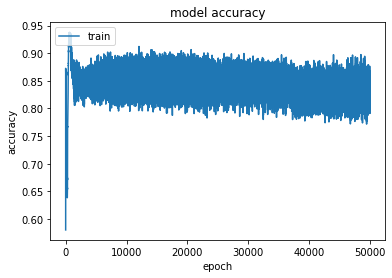

In [30]:
# plot accuracy history
# summarize history for accuracy 
plt.plot(history.history['acc'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#acc_png = './training history/' + file_name + '_accuracy.png'
#plt.savefig(acc_png)
plt.show()

In [31]:
np.set_printoptions(suppress=True)

In [44]:
num = 10000
print(x_train[num,:,:])
print(y_train[num,:,:])

[[106.68900299 184.72399902  42.7745018 ]
 [105.03800201 176.86399841  40.76179886]
 [103.50800323 167.72599792  38.77280045]
 [102.19200134 158.24099731  36.07350159]
 [100.6780014  150.49499512  33.16379929]
 [ 99.09999847 141.60899353  30.55060005]
 [ 97.58190155 134.97900391  26.77359962]
 [ 96.09030151 125.98500061  23.33469963]
 [ 94.70980072 117.90299988  19.51320076]]
[[ 93.3844986  110.05000305  15.32970047]
 [ 91.90080261 101.81900024  11.02340031]
 [ 90.50939941  94.35199738   6.35971022]
 [ 89.02629852  87.56150055   2.03105998]
 [ 87.65209961  78.45939636   6.66306019]
 [ 86.21849823  69.86630249  10.86530018]
 [ 84.87940216  61.75490189  14.51249981]
 [ 83.46350098  53.63389969  17.85059929]
 [ 82.10440063  45.19419861  21.04409981]]


In [53]:
y_pred = model.predict(x_train[num,:,:].reshape(1,9,3), verbose=1)
print(y_pred)

1/1 [==============================] - 0s 90ms/step
[[[ 92.737015  108.462265   14.388348 ]
  [ 91.668625  101.93714    10.197933 ]
  [ 90.09417    94.432365    4.860133 ]
  [ 89.09449    87.22022     2.3936775]
  [ 87.841286   79.506935    6.2213864]
  [ 86.42717    71.12129    10.681717 ]
  [ 85.24176    63.288242   13.943891 ]
  [ 83.9209     54.750587   17.151316 ]
  [ 82.64226    46.713028   20.094547 ]]]


In [54]:
error = y_train[num,:,:].reshape(1,9,3)-y_pred
error

array([[[ 0.64748383,  1.58773804,  0.94135284],
        [ 0.23217773, -0.11814117,  0.82546711],
        [ 0.4152298 , -0.08036804,  1.49957705],
        [-0.06819153,  0.34127808, -0.36261749],
        [-0.1891861 , -1.04753876,  0.44167376],
        [-0.20867157, -1.25498962,  0.18358326],
        [-0.36235809, -1.53334045,  0.56860924],
        [-0.45739746, -1.11668777,  0.6992836 ],
        [-0.53785706, -1.51882935,  0.94955254]]])

In [47]:
#model.save('./saved model/20200516/prediction_not_fixed_top5')